# Riemann Problem

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

## Exact Solution

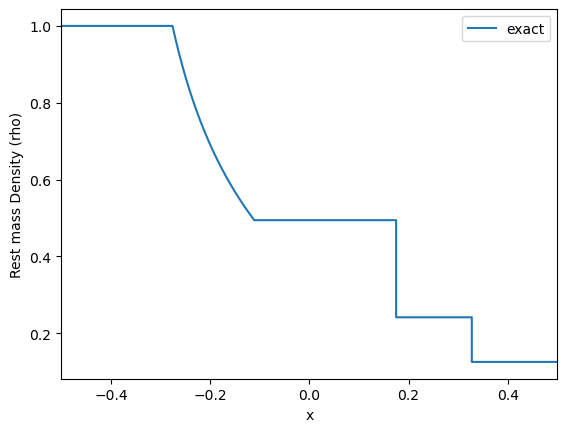

In [3]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.xlabel("x")
plt.ylabel("Rest mass Density (rho)")
plt.title("")
plt.legend()
plt.show()

## Read the Numerical Results

In [21]:
gf= SimDir("/Users/demet/Desktop/Numerical relativity by Bruno/simulations/Sod200").gf  # gf == Grid function values
# print(gf)
# You can notice that no available values for xy, xz, yz, or xyz regarding our parameter phi

# Here, we created a variable that takes the grid values on the x-axis
vars1d=gf.x # vars1d = variable for 1 Dimension
# print(vars1d)

rho = vars1d.fields.rho # You can delete the last rho and press tap to choose any variable you want.

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [22]:
# Creating the grid
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45]) 
# we are taking the limits on the x axis to be (-0.45,0.45) with resolution 101
# We only need a small region for the sake of the exercise.

print(rho.iterations) # Remember to choose the last number 

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]


In [23]:
rho_final = rho.read_on_grid(100, small_grid) # we choose the last number in the iteration
# print(*rho_final.coordinates_meshgrid())

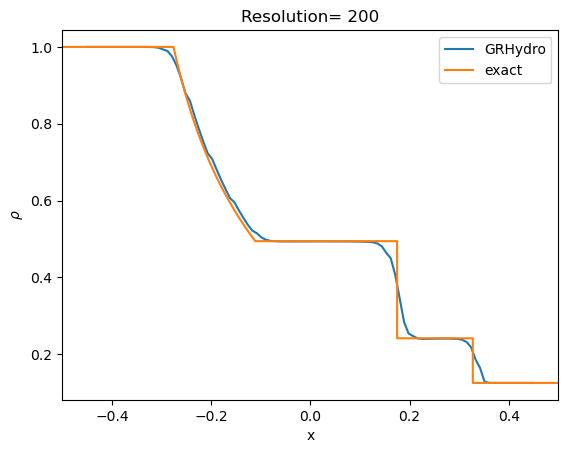

In [24]:
# plt.figure(figsize(10,4))
# plt.subplot(3,1,1)
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.xlabel("x")
plt.ylabel(r'$\rho$')
plt.title("Resolution= 200")
plt.legend()
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

In [26]:
#[iterazione][refinement level][component number]
rho[0][0][0].data

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ,

In [14]:
rho[0][0][0].coordinates()[0].data

array([-0.4975, -0.495 , -0.4925, -0.49  , -0.4875, -0.485 , -0.4825,
       -0.48  , -0.4775, -0.475 , -0.4725, -0.47  , -0.4675, -0.465 ,
       -0.4625, -0.46  , -0.4575, -0.455 , -0.4525, -0.45  , -0.4475,
       -0.445 , -0.4425, -0.44  , -0.4375, -0.435 , -0.4325, -0.43  ,
       -0.4275, -0.425 , -0.4225, -0.42  , -0.4175, -0.415 , -0.4125,
       -0.41  , -0.4075, -0.405 , -0.4025, -0.4   , -0.3975, -0.395 ,
       -0.3925, -0.39  , -0.3875, -0.385 , -0.3825, -0.38  , -0.3775,
       -0.375 , -0.3725, -0.37  , -0.3675, -0.365 , -0.3625, -0.36  ,
       -0.3575, -0.355 , -0.3525, -0.35  , -0.3475, -0.345 , -0.3425,
       -0.34  , -0.3375, -0.335 , -0.3325, -0.33  , -0.3275, -0.325 ,
       -0.3225, -0.32  , -0.3175, -0.315 , -0.3125, -0.31  , -0.3075,
       -0.305 , -0.3025, -0.3   , -0.2975, -0.295 , -0.2925, -0.29  ,
       -0.2875, -0.285 , -0.2825, -0.28  , -0.2775, -0.275 , -0.2725,
       -0.27  , -0.2675, -0.265 , -0.2625, -0.26  , -0.2575, -0.255 ,
       -0.2525, -0.2

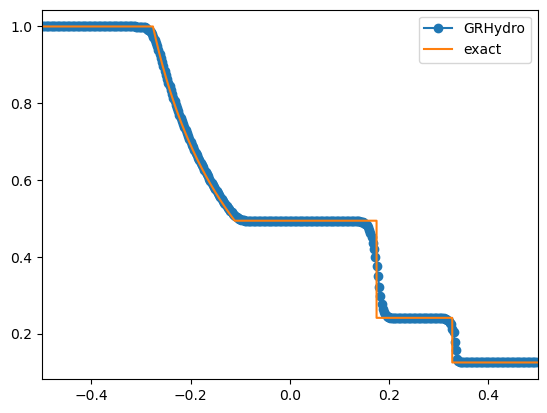

In [27]:
plt.plot(rho[200][0][0].coordinates()[0].data,rho[200][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()